## Let's have a look to K-means	algorithm

K-means optimization objective	
   
$c^{(i)}=index\ of\ cluster\ (1,2,3,..K)\ to\ which\ example\ x^{(i)}\ has\ been\ assigned$

$\mu_k=\ Cluster\ centroid\ k\ (\mu_k \in R^n)$

$\mu_c^{(i)}=\ Cluster\ centroid\ of\ cluster\ to\ which\ example\ has\ been\ assigned$

Optimization\ Objective

$J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_K)=\frac{1}{m} \sum_{j=1}^{m}||{(x^{(i)}-\mu_c(i)}||^2$

$\ \ min\ J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_K)\$

$c^{(i)},...,c^{(m)}$

$\mu_1,...,\mu_K$

Randomly initialize $ k$ Cluster Centroids: $\mu_1,\mu_2,\mu_3,\mu_k \in R^n$ 

$Repeat \{ $

$      \ For\ i=1\ to\ n$

$      \ \ \ c^{(i)}:=index\ (from\ 1\ to\ k)\ of\ cluster\ centroid\ closest\ to\ x^{(i)}$

$      \ For\ k=1\ to\ K$

$\ \ \ \mu_k:=average(mean)\ of\ points\ assigned\ to\ cluster$

$\}$

The right definition of the K number of centroids can be supported by means of some tools, the most common is the 
Helbow method
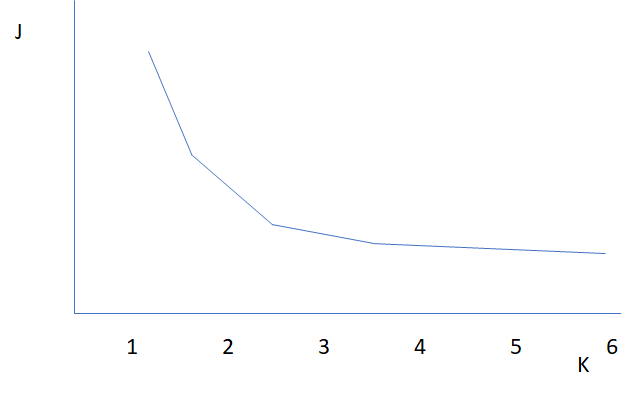

# Example of classic clustering and quantum dataset setup
Clustering is performed on sample data from public datasets on Kaggle.
Clustering is first performed on normal Cartesian coordinates.
Clustering Cartesian coordinates are the two parameters of __annual income__ and __spending score__
The Elbow method is also used to determine the optimal number of clusters.
The calculation is then repeated by transforming the calculating dataset:

Theta = arctan(annual income/spending score)*10000$

(Multiplies by 10,000 to improve accuracy)

Then clustering is performed with respect to the dimensions __customer ID__ and __Theta__

It is observed that both the number of clusters and the clustering maintain the topological validity

20 points are chosen to perform the quantum calculation (only 20 points are chosen to avoid processing too long)

In [1]:
#import libraries
#!pip uninstall numpy -y
#!pip uninstall numpy -y
#!pip install numpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

## Data import from COS

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
#Visualizzazione del dataset 
dataset.head(200) 

,CustomerID,Gender,Age,Annual Income_k$,Spending Score_1_to_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Determination of the correlation between Spending Score and other parameters

In [4]:
# Mapping the gender column in numerical values
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender_codes'] = dataset['Gender'].cat.codes
dataset.head(10)

,CustomerID,Gender,Age,Annual Income_k$,Spending Score_1_to_100,Gender_codes
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,1
9,10,Female,30,19,72,0


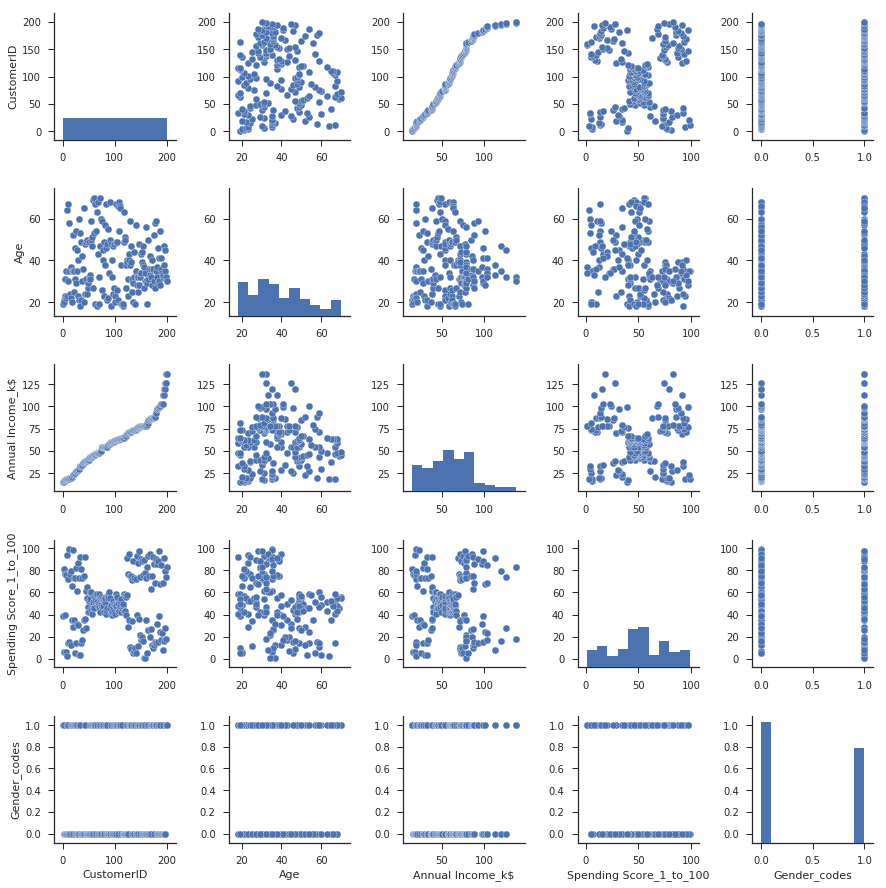

In [5]:
# Determine the pairplot matrix for correlation verification
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)

## Data verification and creation of the Theta column

In [6]:
# Verification of total rows and columns
dataset.shape

(200, 6)

In [7]:
dataset.info() # Verify type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
CustomerID                 200 non-null int64
Gender                     200 non-null category
Age                        200 non-null int64
Annual Income_k$           200 non-null int64
Spending Score_1_to_100    200 non-null int64
Gender_codes               200 non-null int8
dtypes: category(1), int64(4), int8(1)
memory usage: 6.8 KB


In [8]:
# and any missing values
dataset.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income_k$           0
Spending Score_1_to_100    0
Gender_codes               0
dtype: int64

In [9]:
# Added Theta angle (manyplixo for 10,000 to increase accuracy later)
dataset['Teta']=np.arctan(dataset['Annual Income_k$'].values.astype(float)/dataset['Spending Score_1_to_100'].values.astype(float))*10000
dataset.head(10)

,CustomerID,Gender,Age,Annual Income_k$,Spending Score_1_to_100,Gender_codes,Teta
0,1,Male,19,15,39,1,3671.738338
1,2,Male,21,15,81,1,1831.108173
2,3,Female,20,16,6,0,12120.256565
3,4,Female,23,16,77,0,2048.767170
4,5,Female,31,17,40,0,4018.706474
5,6,Female,22,17,76,0,2200.617026
6,7,Female,35,18,6,0,12490.457724
7,8,Female,23,18,94,0,1891.990221
8,9,Male,64,19,3,1,14141.944498
9,10,Female,30,19,72,0,2580.072419


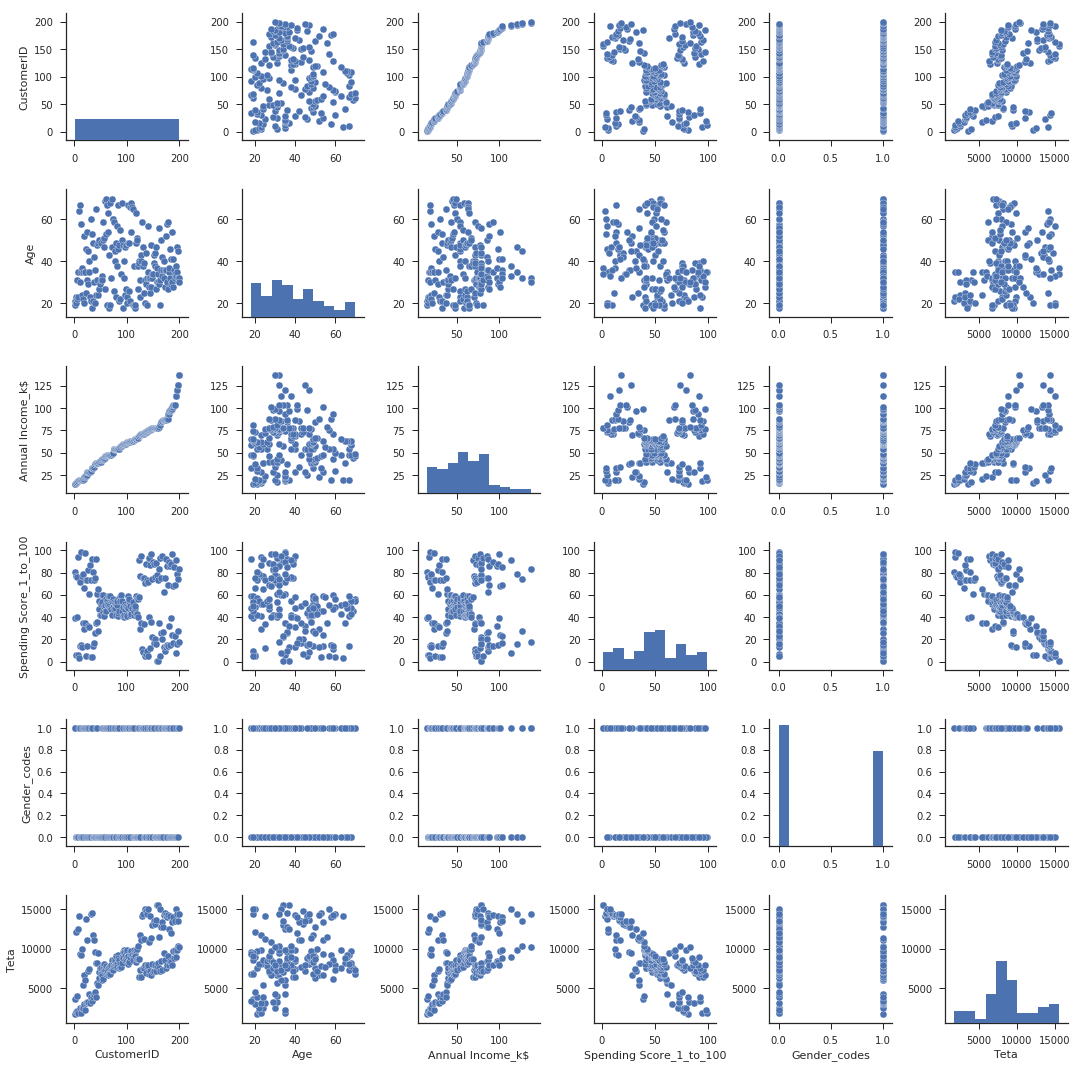

In [10]:
# I review the pairplot matrix to verify correlations also with Theta
sns.set(style="ticks", color_codes=True)
g1 = sns.pairplot(dataset)

## Data display of the model to be clustered

In [11]:
### Feature sleection for the model
# Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values.astype(int)

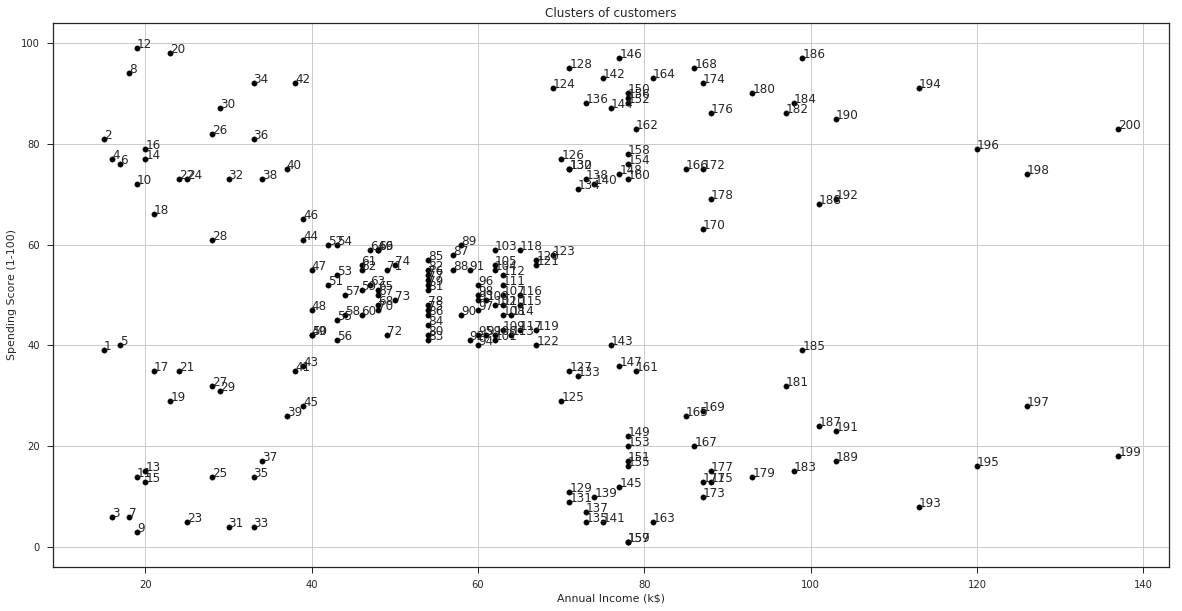

In [12]:
#Visualizing data by entering the customer code "CustomerID" as the point ID

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 30, c = 'black', label = 'Sample')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['CustomerID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
#plt.legend()
plt.grid()
plt.show()

## Creating the model with sklearn

In [13]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=1000,tol=0.000001) # Only 1000 iteration for performance reason
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

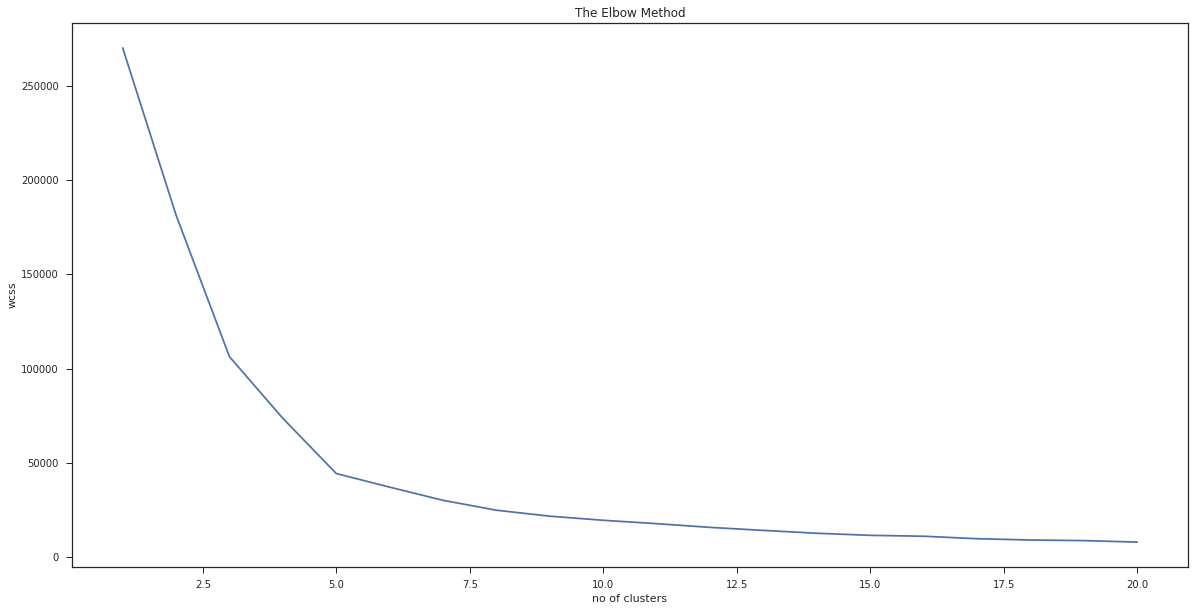

In [14]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

__it is observed that the "elbow" of the curve is for 5 clusters__

In [15]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5

#Model Build for k=5
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0) #Numero di iterazioni a 10000 
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [16]:
# Posizione dei centroidi
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

[[55 50]
 [88 17]
 [26 21]
 [26 79]
 [87 82]]


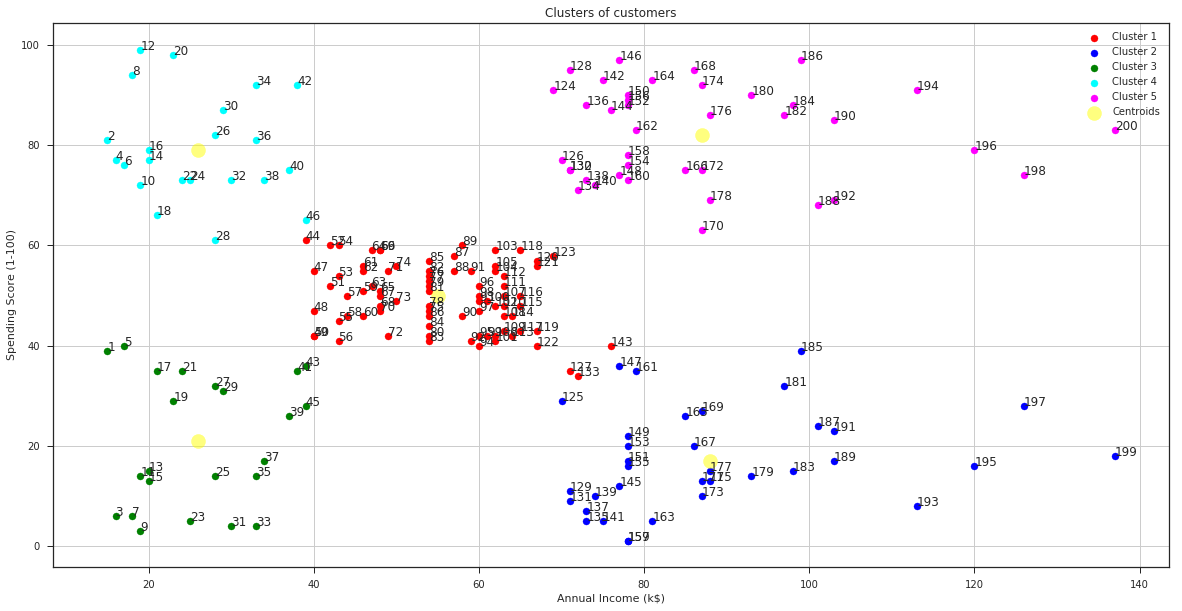

In [17]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['CustomerID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

In [18]:
# Final data frame creation with added cluster column
datasetClusterd = dataset
datasetClusterd['Centroid']=y_kmeans.tolist()
datasetClusterd['Centroid']=datasetClusterd['Centroid']+1
datasetClusterd.head(200)

,CustomerID,Gender,Age,Annual Income_k$,Spending Score_1_to_100,Gender_codes,Teta,Centroid
0,1,Male,19,15,39,1,3671.738338,3
1,2,Male,21,15,81,1,1831.108173,4
2,3,Female,20,16,6,0,12120.256565,3
3,4,Female,23,16,77,0,2048.767170,4
4,5,Female,31,17,40,0,4018.706474,3
5,6,Female,22,17,76,0,2200.617026,4
6,7,Female,35,18,6,0,12490.457724,3
7,8,Female,23,18,94,0,1891.990221,4
8,9,Male,64,19,3,1,14141.944498,3
9,10,Female,30,19,72,0,2580.072419,4


# Model transformation by switching to Theta + customer ID

In [19]:
### Feature sleection for the model
#Considering only 2 features (ID + Theta) and no Label available
X= dataset.iloc[:, [0,6]].values.astype(float)

## Display of transformed model data

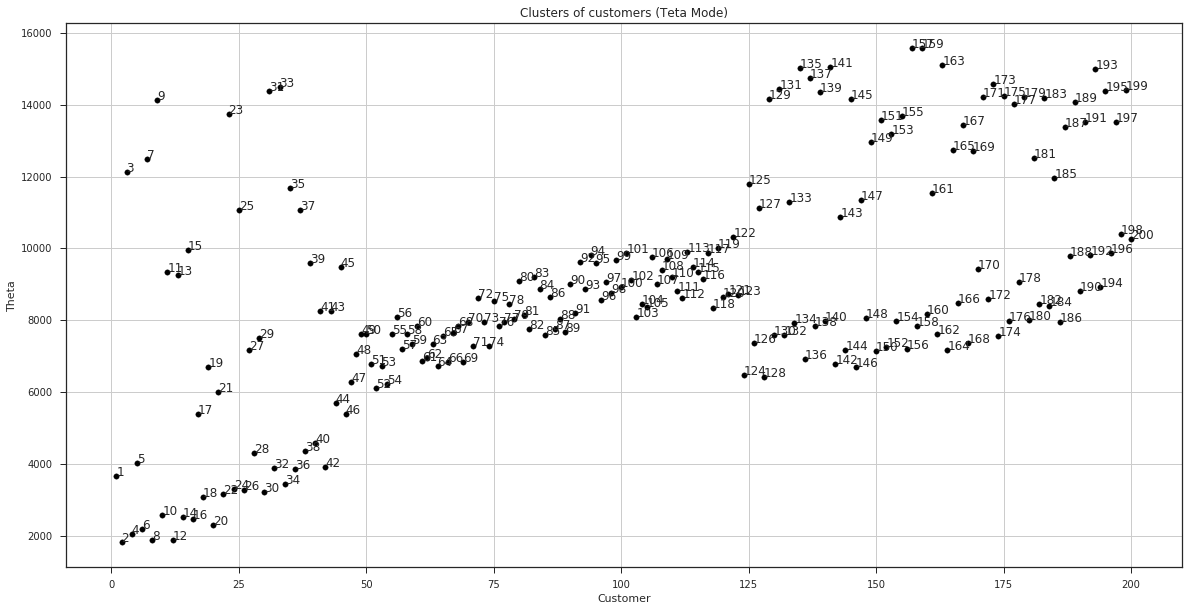

In [20]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 30, c = 'black', label = 'Sample')
plt.title('Clusters of customers (Teta Mode)')
plt.xlabel('Customer')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['CustomerID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
#plt.legend()
plt.grid()
plt.show()

## Elbow method on new model

In [21]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=1000,tol=0.000001)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

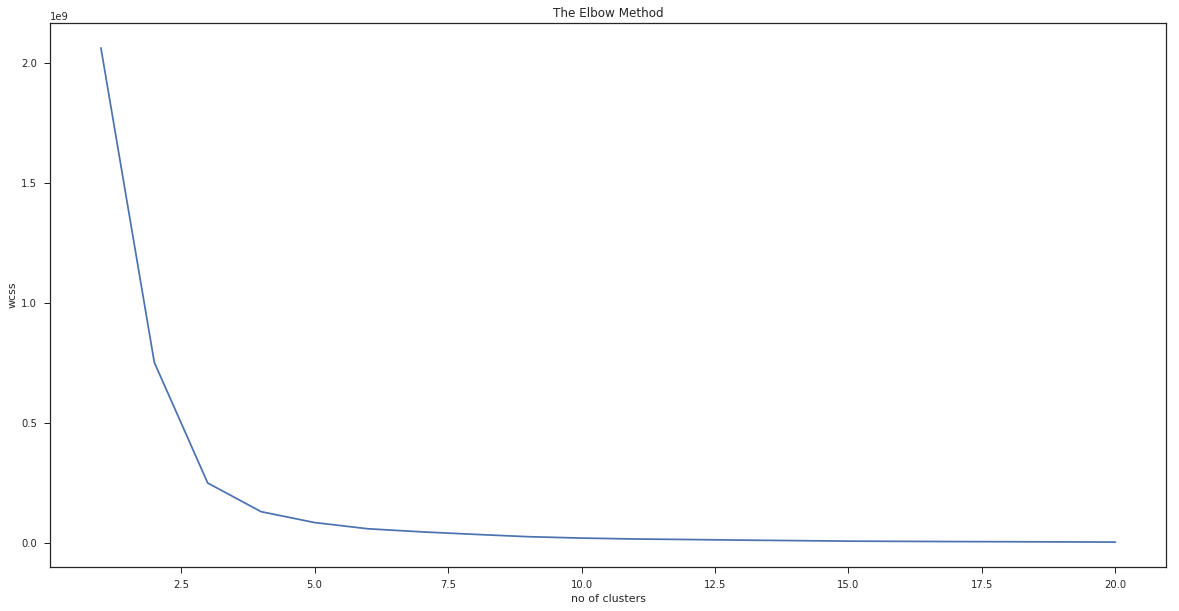

In [22]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

__it is observed that the "elbow" of the curve is still compatible with for 5 clusters__

In [23]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [24]:
# centroids position
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

[[   93  7356]
 [  147 14276]
 [   20  3126]
 [  112 11829]
 [  114  9195]]


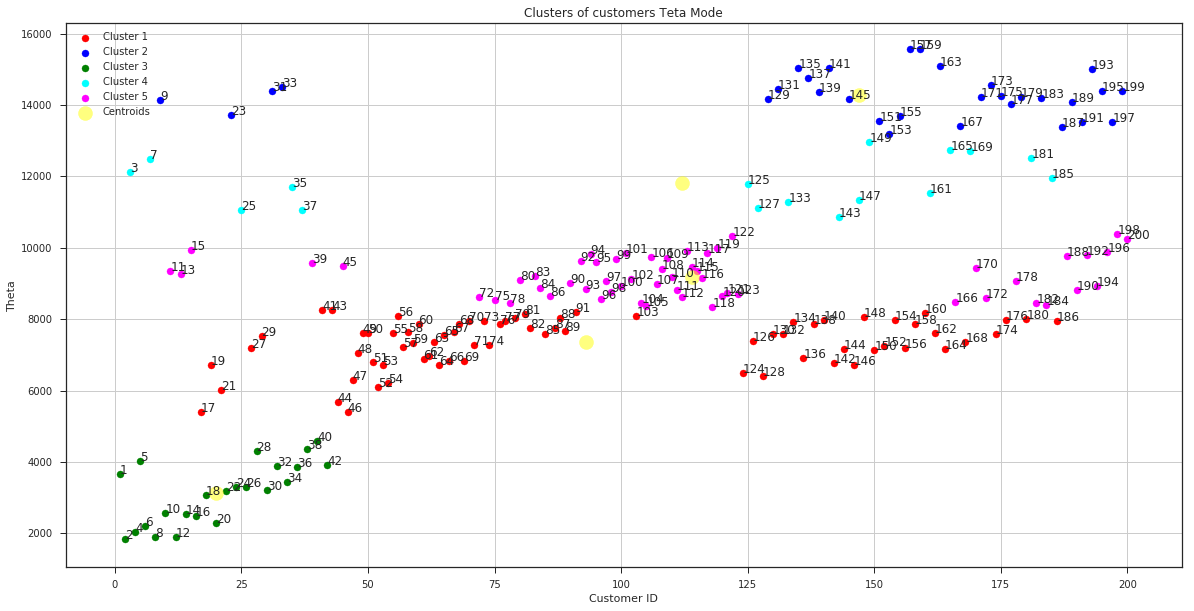

In [25]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['CustomerID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()


In [26]:
# Final data frame creation with added cluster column
datasetClusterd1 = dataset
datasetClusterd1['Centroid']=y_kmeans.tolist()
datasetClusterd1['Centroid']=datasetClusterd1['Centroid']+1
datasetClusterd1.head(200)

,CustomerID,Gender,Age,Annual Income_k$,Spending Score_1_to_100,Gender_codes,Teta,Centroid
0,1,Male,19,15,39,1,3671.738338,3
1,2,Male,21,15,81,1,1831.108173,3
2,3,Female,20,16,6,0,12120.256565,4
3,4,Female,23,16,77,0,2048.767170,3
4,5,Female,31,17,40,0,4018.706474,3
5,6,Female,22,17,76,0,2200.617026,3
6,7,Female,35,18,6,0,12490.457724,4
7,8,Female,23,18,94,0,1891.990221,3
8,9,Male,64,19,3,1,14141.944498,2
9,10,Female,30,19,72,0,2580.072419,3


# Reduced data loading for IBM Q simulation

In [27]:
body = client_8a4fc8dc8bf54832ab62f63af0c03772.get_object(Bucket='ibmq-donotdelete-pr-xowasjpdfpwy5h',Key='DataForQComparison.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()
dataset=df_data_3

In [28]:
#total rows and colums in the dataset
dataset.shape

(20, 2)

In [29]:
#add teta angle for only 2 features (Annual income and Spending Score)
dataset['Theta']=np.arctan(dataset['Annual Income_k$'].values.astype(float)/dataset['Spending Score_1_to_100'].values.astype(float))*10000
dataset['ID']=dataset.reset_index().index
dataset.head(20)

,Annual Income_k$,Spending Score_1_to_100,Theta,ID
0,19,99,1896.136158,0
1,29,87,3217.505544,1
2,21,66,3080.527810,2
3,34,73,4358.769724,3
4,21,35,5404.195003,4
5,34,17,11071.487178,5
6,20,15,9272.952180,6
7,33,4,14501.726582,7
8,46,46,7853.981634,8
9,49,55,7277.697359,9


## Clustering on reduced data and standard features

In [30]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [0,1]].values.astype(int)

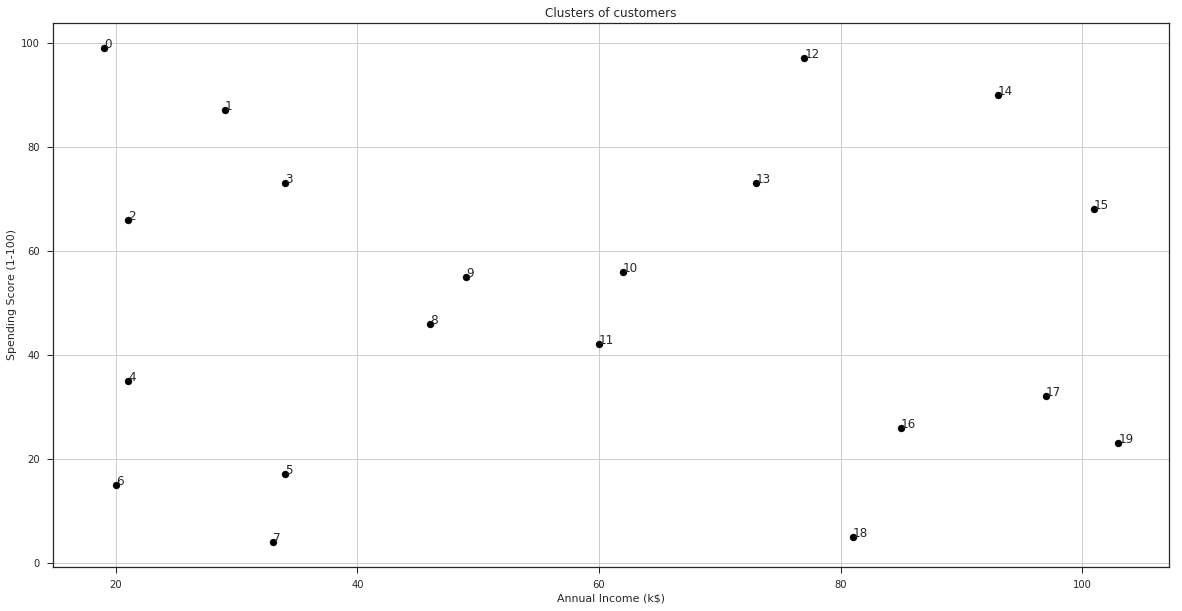

In [31]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
#plt.legend()
plt.grid()
plt.show()

In [32]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=1000,tol=0.000001)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

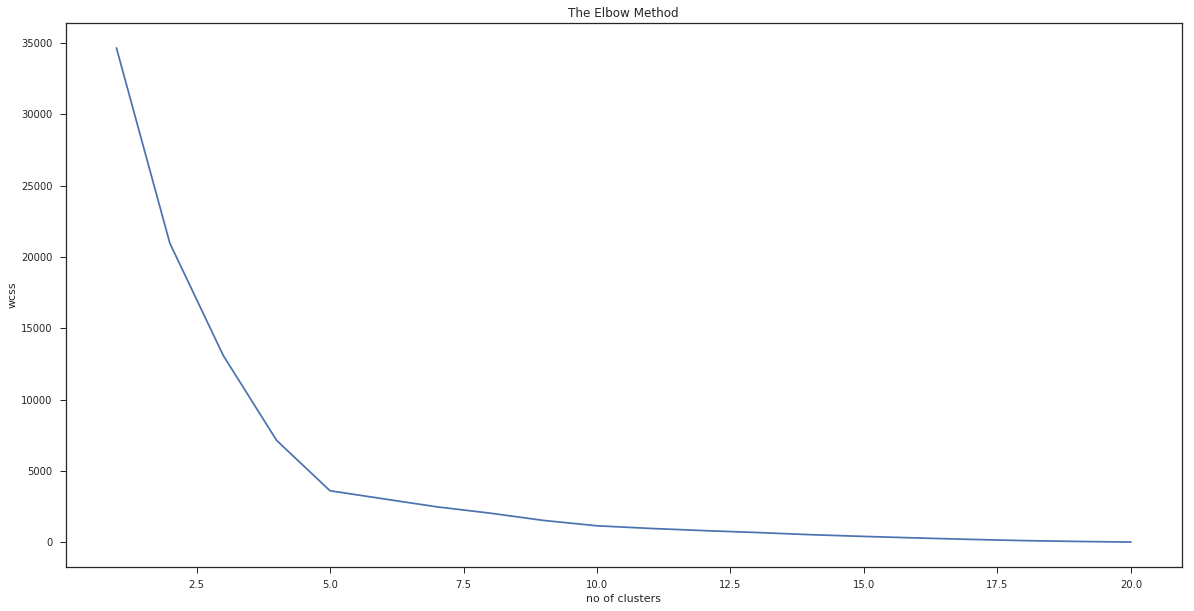

In [33]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [35]:
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

[[92 22]
 [26 81]
 [86 82]
 [27 18]
 [54 50]]


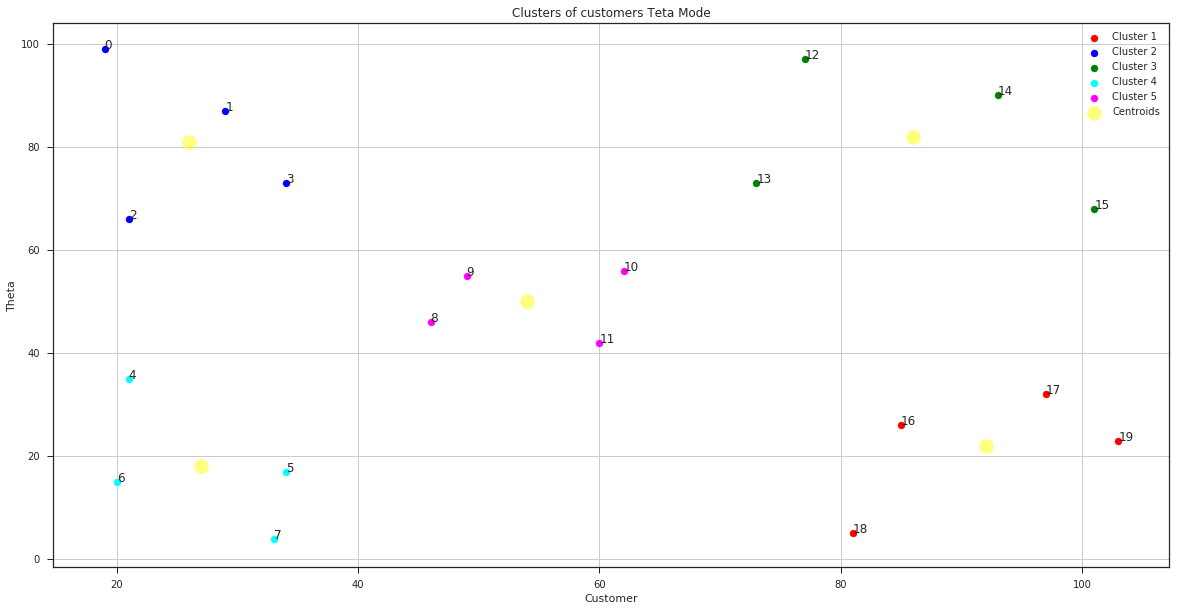

In [36]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

In [37]:
# Final data frame creation with added cluster column
datasetClusterd1 = dataset
datasetClusterd1['Centroid']=y_kmeans.tolist()
datasetClusterd1['Centroid']=datasetClusterd1['Centroid']+1
datasetClusterd1.head(200)

,Annual Income_k$,Spending Score_1_to_100,Theta,ID,Centroid
0,19,99,1896.136158,0,2
1,29,87,3217.505544,1,2
2,21,66,3080.527810,2,2
3,34,73,4358.769724,3,2
4,21,35,5404.195003,4,4
5,34,17,11071.487178,5,4
6,20,15,9272.952180,6,4
7,33,4,14501.726582,7,4
8,46,46,7853.981634,8,5
9,49,55,7277.697359,9,5


## Clustering calculation on Theta and Customer ID

In [38]:
### Feature sleection for the model
#Considering only 2 features (ID + Theta) and no Label available
X= dataset.iloc[:, [3,2]].values.astype(float)

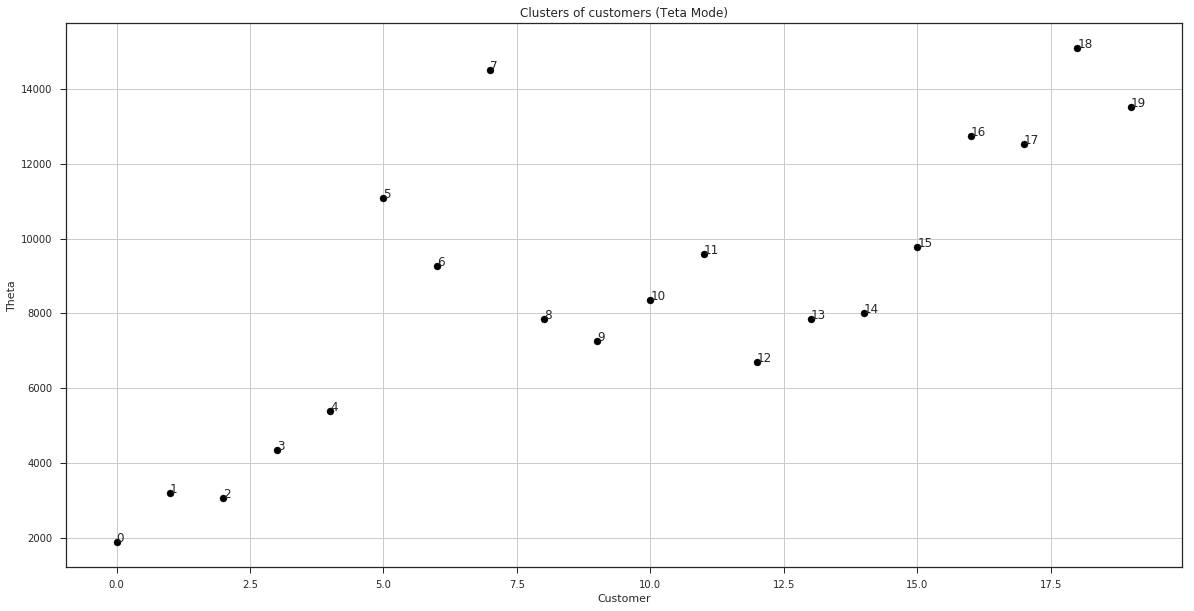

In [39]:
#Visualizing data

plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'black', label = 'Sample')
plt.title('Clusters of customers (Teta Mode)')
plt.xlabel('Customer')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
#plt.legend()
plt.grid()
plt.show()

In [40]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=10000,tol=0.0000001)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

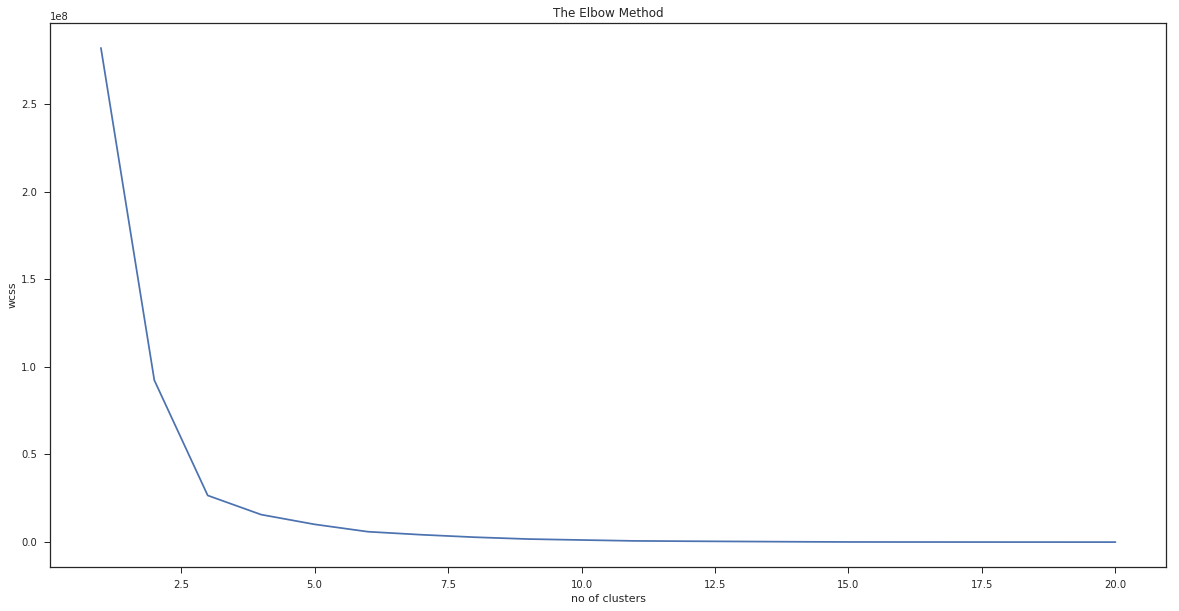

In [41]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(20,10))
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [42]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [43]:
centers_float = kmeans.cluster_centers_
centers=np.rint(centers_float).astype(int)
print(centers)

[[    9  9932]
 [    1  2731]
 [   15 13673]
 [    4  4881]
 [   11  7679]]


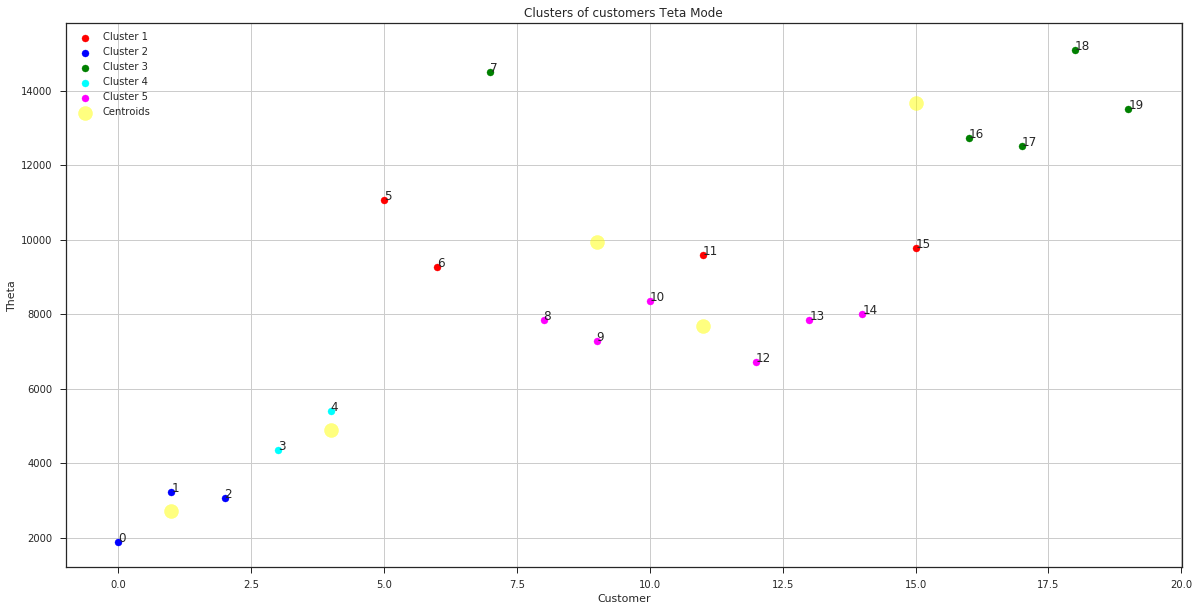

In [44]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')      
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Final data frame creation with added cluster column
datasetClusterd1 = dataset
datasetClusterd1['Centroid']=y_kmeans.tolist()
datasetClusterd1['Centroid']=datasetClusterd1['Centroid']+1
datasetClusterd1.head(200)